In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
sales = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Sales prediction\Weekly_Food_Retail_Prices.csv')

print(sales.shape)
sales.head(5)

(5044923, 8)


,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN
1,Andhra Pradesh,Guntur,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN
2,Andhra Pradesh,Kurnool,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN
3,Andhra Pradesh,Vishakhapatnam,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN
4,Arunachal Pradesh,Itanagar,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN


In [3]:
sales.describe()

,Retail Price
count,2.051754e+06
mean,8.385372e+01
std,1.486131e+02
min,-4.500000e+01
25%,1.900000e+01
50%,3.800000e+01
75%,8.500000e+01
max,2.004500e+04


In [4]:
# check unique values in dataset
sales.apply(lambda x: len(x.unique()))

State             30
Centre            86
Commodity         46
Variety           31
Unit              11
Category           1
Date            1053
Retail Price    2097
dtype: int64

In [5]:
# Get the centre mode for all the states
centre_mode = sales.pivot_table(values='Centre', columns='State', aggfunc=(lambda x: x.mode()[0]))
centre_mode

State,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu Kashmir,Jharkhand,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Union Territories,Uttar Pradesh,Uttarakhand,West Bengal
Centre,Chittoor,Itanagar,Dispur,Patna,Panaji,Gandhi Nagar,Hissar,Shimla,Jammu,Dhanbad,...,Amritsar,Dausa,Gangtok,Chennai,Hyderabad,Agartala,Pondicherry,Agra,Haldwani,Asansol


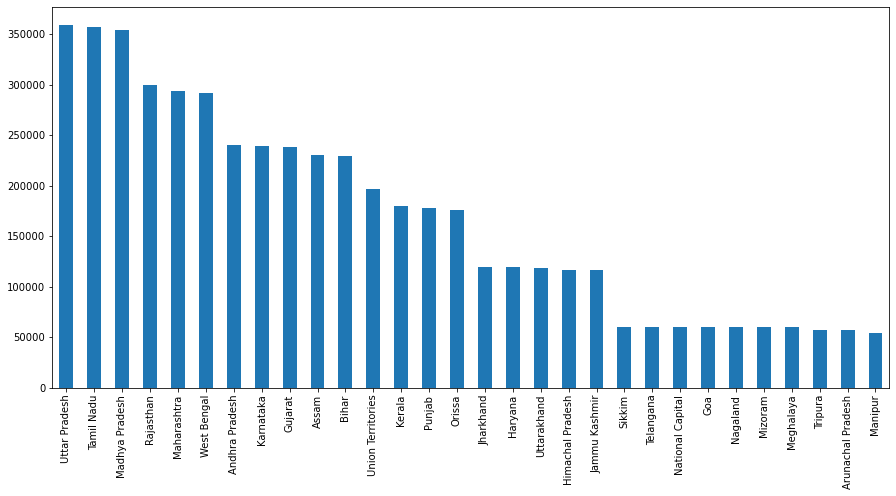

In [6]:
# check the difference in aggregate sales across states
plt.figure(figsize=(15,7))
sales['State'].value_counts().plot(kind='bar')
plt.show()

In [7]:
# check for categorical columns
cat_col = []
for x in sales.dtypes.index:
    if sales.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['State', 'Centre', 'Commodity', 'Variety', 'Unit', 'Category', 'Date']

#### Defining the various categories in the 'Category' column

In [8]:
comm = sales['Commodity']
comm.head(3)

0    Apple
1    Apple
2    Apple
Name: Commodity, dtype: object

In [9]:
cat = sales['Category']
cat.head(3)

0    Food
1    Food
2    Food
Name: Category, dtype: object

In [10]:
df = pd.DataFrame()
df['Commodity'] = comm
df['Category'] = cat

# Create DataFrame
dff = pd.DataFrame()
dff['Dummy'] = df['Commodity'] + " " +  df['Category'].astype(str)
print(dff)

              Dummy
0        Apple Food
1        Apple Food
2        Apple Food
3        Apple Food
4        Apple Food
...             ...
5044918   Milk Food
5044919   Milk Food
5044920   Milk Food
5044921   Milk Food
5044922   Milk Food

[5044923 rows x 1 columns]


In [11]:
# Remove the 'Category' column
sales.drop(['Category'], axis=1, inplace=True)
sales.head(5)

,State,Centre,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Kg.,05/01/2001,NaN
1,Andhra Pradesh,Guntur,Apple,Delicious medium size,Kg.,05/01/2001,NaN
2,Andhra Pradesh,Kurnool,Apple,Delicious medium size,Kg.,05/01/2001,NaN
3,Andhra Pradesh,Vishakhapatnam,Apple,Delicious medium size,Kg.,05/01/2001,NaN
4,Arunachal Pradesh,Itanagar,Apple,Delicious medium size,Kg.,05/01/2001,NaN


In [12]:
dff.rename(columns = {'Dummy':'Category'}, inplace = True)
print(dff)

           Category
0        Apple Food
1        Apple Food
2        Apple Food
3        Apple Food
4        Apple Food
...             ...
5044918   Milk Food
5044919   Milk Food
5044920   Milk Food
5044921   Milk Food
5044922   Milk Food

[5044923 rows x 1 columns]


In [13]:
sales = pd.concat([sales, dff], axis=1)
sales.head(5)

,State,Centre,Commodity,Variety,Unit,Date,Retail Price,Category
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Kg.,05/01/2001,NaN,Apple Food
1,Andhra Pradesh,Guntur,Apple,Delicious medium size,Kg.,05/01/2001,NaN,Apple Food
2,Andhra Pradesh,Kurnool,Apple,Delicious medium size,Kg.,05/01/2001,NaN,Apple Food
3,Andhra Pradesh,Vishakhapatnam,Apple,Delicious medium size,Kg.,05/01/2001,NaN,Apple Food
4,Arunachal Pradesh,Itanagar,Apple,Delicious medium size,Kg.,05/01/2001,NaN,Apple Food


In [14]:
# After extracting and joining the 2 columns, we need to define the category
def category(x):
    if x == 'Apple Food' or x == 'Banana Food' or x == 'Coconut Food':
        return 'Fruits'
    elif x == 'Fish Food':
        return 'Fish'
    elif x == 'Meat Food' or x == 'Chicken Food':
        return 'Meat'
    elif x == 'Milk Food' or x == 'Butter Food' or x == 'Ghee Food':
        return 'Milk products'
    elif x == 'Potato Food' or x == 'Onion Food' or x == 'Brinjal Food' or x == 'Red Chillies Food' or x == 'Coriander Food' or x == 'Tomato Food':
        return 'Vegetables'
    elif x == 'Mustard Oil Food' or x == 'Groundnut Oil Food' or x == 'Coconut Oil Food' or x == 'Gingelly Oil Food':
        return 'Oil'
    elif x == 'Salt Food' or x == 'Sugar Food' or x == 'Gur Food' or x == 'Black Pepper Food' or x == 'Turmeric Food' or x == 'Cumin Seed Food':
        return 'Spices'
    elif x == 'Coffee Food' or x == 'Tea Food':
        return 'Beverages'
    elif x == 'Moong Food' or x == 'Urad Food' or x == 'Masur Food' or x == 'Arhar Food':
        return 'Dal'
    elif x == 'Jowar Food' or x == 'Maida Food' or x == 'Atta Food' or x == 'Wheat Food' or x == 'Bajra Food' or x == 'Ragi Food' or x == 'Maize Food':
        return 'Flour'
    else:
        return 'Misc'

sales['Category'] = sales['Category'].apply(lambda x: category(x))

In [15]:
# Re-ordering the columns
sales = sales.reindex(columns=['State', 'Centre', 'Category', 'Commodity', 'Variety', 'Unit', 'Date', 'Retail Price'])
print(sales.shape)
sales.head(5)

(5044923, 8)


,State,Centre,Category,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN


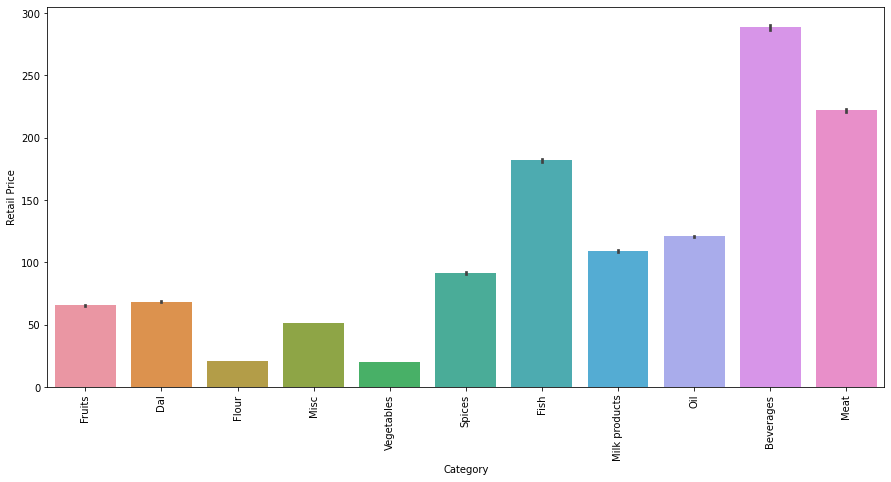

In [16]:
# Visualize the retail prices of the categories
plt.figure(figsize=(15,7))
sns.barplot(x=sales['Category'], y=sales['Retail Price'])
plt.xticks(rotation="vertical")
plt.show()

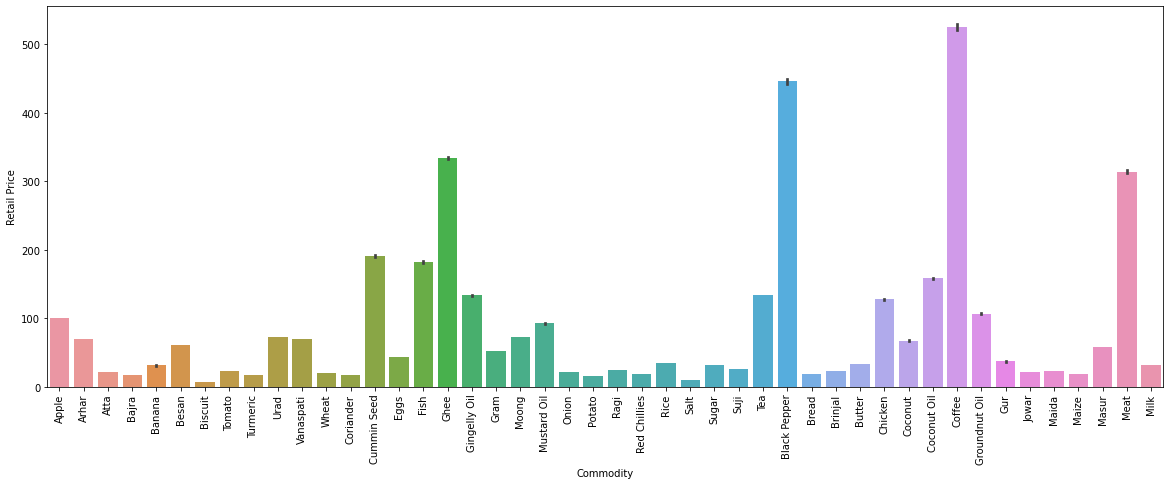

In [17]:
# Visualize the retail prices of the various commodities
plt.figure(figsize=(20,7))
sns.barplot(x=sales['Commodity'], y=sales['Retail Price'])
plt.xticks(rotation="vertical")
plt.show()

#### Get the average price of categories per state

In [18]:
states = ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',  'National Capital', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',  'Tamil Nadu', 'Telangana', 'Tripura', 'Union Territories',  'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
categories = ['Fruits', 'Dal', 'Flour', 'Misc', 'Vegetables', 'Spices', 'Fish', 'Milk products', 'Oil', 'Beverages', 'Meat']

def mean_retail_categories(state, category):
    x = (sales['State'] == state)
    y = (sales['Category'] == category)
    
    s1 = sales[x & y & (sales['Retail Price'] > 0)]
    
    for state in states:
        for category in categories:
            return s1['Retail Price'].mean()

In [19]:
# Calling the func with custom values
mean_retail_categories("Bihar", "Fruits")

81.35905788023052

In [20]:
mean_retail_categories("Assam", "Fruits")

62.85070214338507

#### Get the average price of commodities per state

In [21]:
commodities = ['Apple', 'Arhar', 'Atta', 'Bajra', 'Banana', 'Besan', 'Biscuit', 'Tomato', 'Turmeric', 'Urad', 'Vanaspati', 'Wheat', 'Coriander', 'Cummin Seed', 'Eggs', 'Fish', 'Ghee', 'Gingelly Oil', 'Gram', 'Moong', 'Mustard Oil', 'Onion', 'Potato', 'Ragi', 'Red Chillies', 'Rice', 'Salt', 'Sugar', 'Suji', 'Tea', 'Black Pepper', 'Bread', 'Brinjal', 'Butter', 'Chicken', 'Coconut', 'Coconut Oil', 'Coffee', 'Groundnut Oil', 'Gur', 'Jowar', 'Maida', 'Maize', 'Masur', 'Meat', 'Milk']
states = ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',  'National Capital', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',  'Tamil Nadu', 'Telangana', 'Tripura', 'Union Territories',  'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

def mean_retail_products(state, commodity):
    x = (sales['State'] == state)
    y = (sales['Commodity'] == commodity)
    
    s2 = sales[x & y & (sales['Retail Price'] > 0)]
    
    for state in states:
        for commodity in commodities:
            return s2['Retail Price'].mean()

In [22]:
# Calling the func with custom values
mean_retail_products("Bihar", "Apple")

82.38476755687438

In [23]:
mean_retail_products("Assam", "Apple")

114.86101694915254

In [24]:
# Let's check for null values
sales.isnull().sum()

State                 0
Centre                0
Category              0
Commodity             0
Variety          890838
Unit                  0
Date                  0
Retail Price    2993169
dtype: int64

In [25]:
# There are 890838 missing values in 'Variety', so fill it
sales["Variety"].fillna("FAQ", inplace = True)

In [26]:
sales.head(10)

,State,Centre,Category,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
5,Assam,Dibrugarh,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
6,Assam,Dispur,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
7,Assam,Guwahati,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
8,Assam,Silchar,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN
9,Bihar,Gaya,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,NaN


In [27]:
sales['Variety'].unique()

array(['Delicious medium size', 'Split', 'FAQ', 'Glucose',
       'Powdered Agmark', 'Desi', 'Kalyan HYV', 'Common', 'Cat Fish',
       'Pomphret', 'Rohu 1Kg Size', 'Whole', 'Common/Coarse', 'Fine',
       'Superfine', 'Loose(common)', 'Packet(iodized)',
       'Brooke Bond Red Label', 'Ctc(loose)', 'Local', 'Amul/Any Other',
       'Poultry', 'Dry', 'Fresh', 'Instant', 'Powdered', 'White',
       'Mutton', 'Cow/Buffalo', 'Dairy'], dtype=object)

In [28]:
# There are 2993169 missing values in 'Retail Price', so fill it
sales['Retail Price'] = sales['Retail Price'].fillna(sales['Retail Price'].median())

In [29]:
sales.head(10)

,State,Centre,Category,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
5,Assam,Dibrugarh,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
6,Assam,Dispur,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
7,Assam,Guwahati,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
8,Assam,Silchar,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0
9,Bihar,Gaya,Fruits,Apple,Delicious medium size,Kg.,05/01/2001,38.0


In [30]:
sales['Retail Price'].unique()

array([  38. ,   24. ,   19. , ..., 1133. ,   91.5,  746. ])

In [31]:
# Dealing with the 'Unit' column
sales['Unit'].unique()

array(['Kg.', 'Dozen', '80gm. Pkt', '100gm. Pkt', 'Kg/Litre', 'Kg',
       '250gm. Pkt', '400/800 Gm', 'Peice', '500gm. Pkt', 'Litre'],
      dtype=object)

In [32]:
sales['Unit'].replace(['Kg.', 'Dozen', '80gm. Pkt', '100gm. Pkt', 'Kg/Litre', 'Kg', '250gm. Pkt','400/800 Gm', 'Peice', '500gm. Pkt', 'Litre'], [1, 1, 0.08, 0.1, 1, 1, 0.25, 0.5, 1, 0.5, 1], inplace=True)

In [33]:
sales.head(10)

,State,Centre,Category,Commodity,Variety,Unit,Date,Retail Price
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0
5,Assam,Dibrugarh,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0
6,Assam,Dispur,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0
7,Assam,Guwahati,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0
8,Assam,Silchar,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0
9,Bihar,Gaya,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0


In [34]:
# analysing the 'Date' column
sales['Date'].value_counts()

05/01/2001    4791
11/04/2014    4791
25/04/2014    4791
02/05/2014    4791
09/05/2014    4791
              ... 
02/11/2007    4791
09/11/2007    4791
16/11/2007    4791
23/11/2007    4791
05/03/2021    4791
Name: Date, Length: 1053, dtype: int64

In [35]:
# Create DataFrame
date = sales['Date']

df = pd.DataFrame()
df['date'] = date
print(df)

               date
0        05/01/2001
1        05/01/2001
2        05/01/2001
3        05/01/2001
4        05/01/2001
...             ...
5044918  05/03/2021
5044919  05/03/2021
5044920  05/03/2021
5044921  05/03/2021
5044922  05/03/2021

[5044923 rows x 1 columns]


In [36]:
# split column into multiple columns by delimiter 
df[['Date', 'Month', 'Year']] = df['date'].str.split('/', expand=True)
df

,date,Date,Month,Year
0,05/01/2001,05,01,2001
1,05/01/2001,05,01,2001
2,05/01/2001,05,01,2001
3,05/01/2001,05,01,2001
4,05/01/2001,05,01,2001
...,...,...,...,...
5044918,05/03/2021,05,03,2021
5044919,05/03/2021,05,03,2021
5044920,05/03/2021,05,03,2021
5044921,05/03/2021,05,03,2021


In [37]:
# creating a new dataframe
dff = pd.DataFrame()
dff['Month'] = df['Month'].replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11','12'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
dff

,Month
0,1
1,1
2,1
3,1
4,1
...,...
5044918,3
5044919,3
5044920,3
5044921,3


In [38]:
sales = pd.concat([sales, dff], axis=1)
sales.head(5)

,State,Centre,Category,Commodity,Variety,Unit,Date,Retail Price,Month
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0,1
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0,1
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0,1
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0,1
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,1.0,05/01/2001,38.0,1


In [39]:
# Remove the 'Date' column
sales.drop(['Date'], axis=1, inplace=True)
sales.head(5)

,State,Centre,Category,Commodity,Variety,Unit,Retail Price,Month
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,1.0,38.0,1
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,1.0,38.0,1
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,1.0,38.0,1
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,1.0,38.0,1
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,1.0,38.0,1


In [40]:
# Re-ordering the columns
sales = sales.reindex(columns=['State', 'Centre', 'Category', 'Commodity', 'Variety', 'Unit', 'Month', 'Retail Price'])
print(sales.shape)
sales.head(5)

(5044923, 8)


,State,Centre,Category,Commodity,Variety,Unit,Month,Retail Price
0,Andhra Pradesh,Chittoor,Fruits,Apple,Delicious medium size,1.0,1,38.0
1,Andhra Pradesh,Guntur,Fruits,Apple,Delicious medium size,1.0,1,38.0
2,Andhra Pradesh,Kurnool,Fruits,Apple,Delicious medium size,1.0,1,38.0
3,Andhra Pradesh,Vishakhapatnam,Fruits,Apple,Delicious medium size,1.0,1,38.0
4,Arunachal Pradesh,Itanagar,Fruits,Apple,Delicious medium size,1.0,1,38.0


In [41]:
# Grouping the rows and averaging the Retail Price
sales = sales.groupby(['State', 'Centre', 'Commodity', 'Variety', 'Category', 'Unit', 'Month'], axis=0, as_index=False).mean()

sales.head(10)

,State,Centre,Commodity,Variety,Category,Unit,Month,Retail Price
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,1,84.946237
1,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,2,86.858824
2,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,3,88.188889
3,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,4,87.529412
4,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,5,95.449438
5,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,6,93.465116
6,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,7,96.056818
7,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,8,92.888889
8,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,9,81.470588
9,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,10,77.886364


#### Visualizing the 'target' variable

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


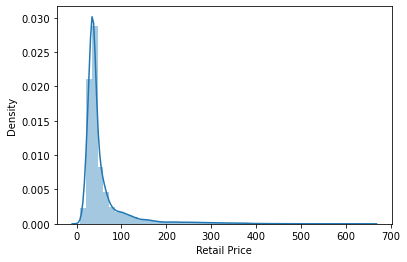

In [42]:
sns.distplot(sales['Retail Price'])
plt.show()

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


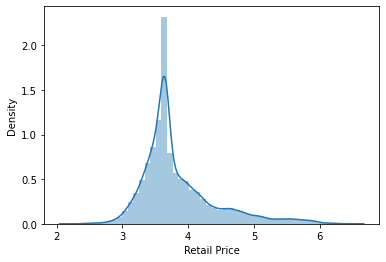

In [43]:
# Since it is skewed, we need to normalize it by applying Log Transformation
# In order to avoid infinite values, we add +1
sales['Retail Price'] = np.log(1+sales['Retail Price'])

sns.distplot(sales['Retail Price'])
plt.show()

In [44]:
# Let's check if any more missing values present
sales.isnull().sum()

State           0
Centre          0
Commodity       0
Variety         0
Category        0
Unit            0
Month           0
Retail Price    0
dtype: int64

#### Visualizing the categorical variables

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


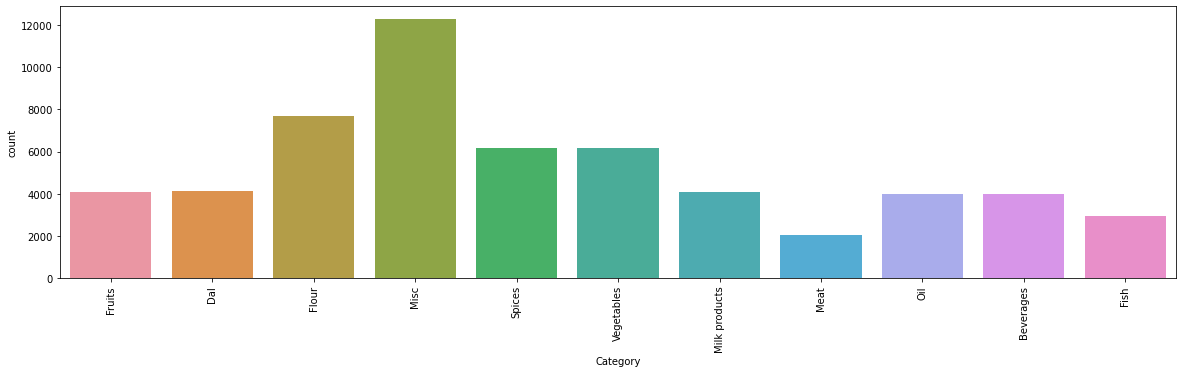

In [45]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Category'])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


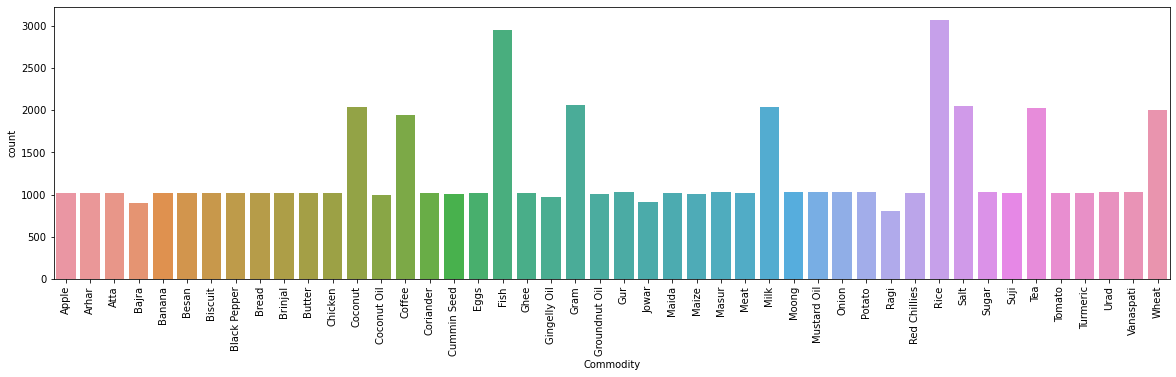

In [46]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Commodity'])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


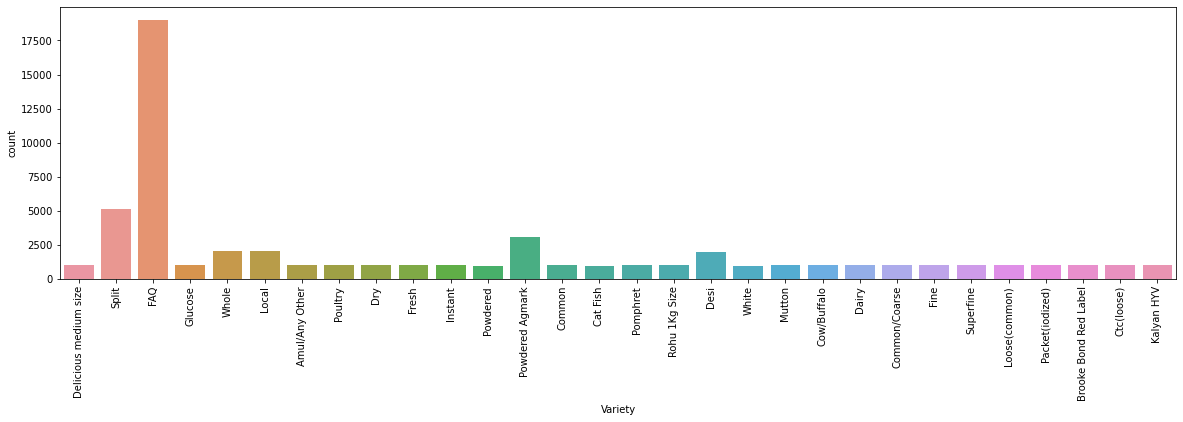

In [47]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Variety'])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


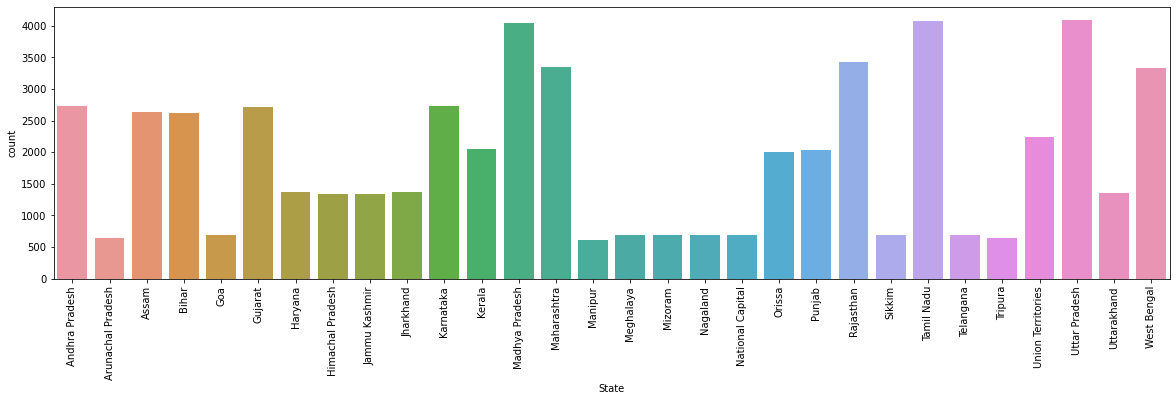

In [48]:
plt.figure(figsize=(20,5))
sns.countplot(sales['State'])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


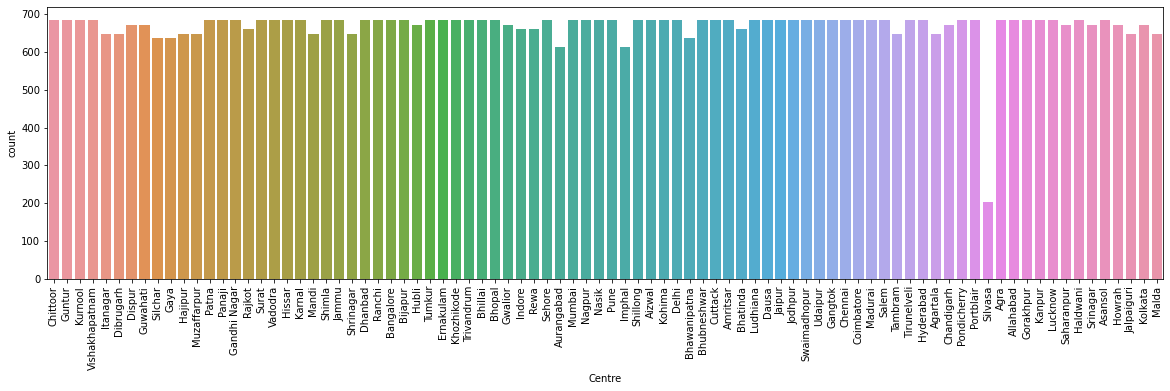

In [49]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Centre'])
plt.xticks(rotation="vertical")
plt.show()

In [50]:
sales.head(5)

,State,Centre,Commodity,Variety,Category,Unit,Month,Retail Price
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,1,4.453722
1,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,2,4.475731
2,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,3,4.490756
3,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,4,4.483335
4,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,5,4.569019


### One Hot Encoding

In [51]:
# One Hot Encoding -> new column for each category
category = pd.get_dummies(sales['Category'])
category.head(3)

,Beverages,Dal,Fish,Flour,Fruits,Meat,Milk products,Misc,Oil,Spices,Vegetables
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0


In [52]:
# To avoid dummy-variable trap, we should have 1 less dummies column
# If all categories are 0, it will mean 'Misc' is 1, so we can safely drop it
category = category.drop(['Misc'], axis='columns')
category.head(3)

,Beverages,Dal,Fish,Flour,Fruits,Meat,Milk products,Oil,Spices,Vegetables
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0


In [53]:
variety = pd.get_dummies(sales['Variety'])
variety = variety.drop(['FAQ'], axis='columns')
variety.head(3)

,Amul/Any Other,Brooke Bond Red Label,Cat Fish,Common,Common/Coarse,Cow/Buffalo,Ctc(loose),Dairy,Delicious medium size,Desi,...,Packet(iodized),Pomphret,Poultry,Powdered,Powdered Agmark,Rohu 1Kg Size,Split,Superfine,White,Whole
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
commodity = pd.get_dummies(sales['Commodity'], drop_first=True)
commodity.head(3)

,Arhar,Atta,Bajra,Banana,Besan,Biscuit,Black Pepper,Bread,Brinjal,Butter,...,Rice,Salt,Sugar,Suji,Tea,Tomato,Turmeric,Urad,Vanaspati,Wheat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
state = pd.get_dummies(sales['State'], drop_first=True)
state.head(3)

,Arunachal Pradesh,Assam,Bihar,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu Kashmir,Jharkhand,Karnataka,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Union Territories,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
centre = pd.get_dummies(sales['Centre'], drop_first=True)
centre.head(3)

,Agra,Aizwal,Allahabad,Amritsar,Asansol,Aurangabad,Bangalore,Bhatinda,Bhawanipatna,Bhillai,...,Srinagar,Surat,Swaimadhopur,Tambram,Tirunelveli,Trivandrum,Tumkur,Udaipur,Vadodra,Vishakhapatnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# concat it into our main dataset
sales = pd.concat([category, commodity, state, centre, variety, sales], axis='columns')
sales.head(5)

,Beverages,Dal,Fish,Flour,Fruits,Meat,Milk products,Oil,Spices,Vegetables,...,White,Whole,State,Centre,Commodity,Variety,Category,Unit,Month,Retail Price
0,0,0,0,0,1,0,0,0,0,0,...,0,0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,1,4.453722
1,0,0,0,0,1,0,0,0,0,0,...,0,0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,2,4.475731
2,0,0,0,0,1,0,0,0,0,0,...,0,0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,3,4.490756
3,0,0,0,0,1,0,0,0,0,0,...,0,0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,4,4.483335
4,0,0,0,0,1,0,0,0,0,0,...,0,0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Fruits,1.0,5,4.569019


In [58]:
# Drop off the extra columns now
sales = sales.drop(['State', 'Category', 'Commodity', 'Centre', 'Variety'], axis='columns')
sales.head(5)

,Beverages,Dal,Fish,Flour,Fruits,Meat,Milk products,Oil,Spices,Vegetables,...,Powdered,Powdered Agmark,Rohu 1Kg Size,Split,Superfine,White,Whole,Unit,Month,Retail Price
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,1,4.453722
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,2,4.475731
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,3,4.490756
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,4,4.483335
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,5,4.569019


In [59]:
# check for null values
sales.isnull().sum()

Beverages       0
Dal             0
Fish            0
Flour           0
Fruits          0
               ..
White           0
Whole           0
Unit            0
Month           0
Retail Price    0
Length: 201, dtype: int64

### Building our model

In [60]:
# Define the 'features' and 'labels'
X = sales.drop('Retail Price', axis='columns')
y = sales['Retail Price']

In [61]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [62]:
# Scale down i/p features for better results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression model

In [63]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [64]:
# evaluating our model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Score(in %): ", (r2_score(y_test, y_pred))*100)
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))

Score(in %):  73.08075783463785
Mean absolute error:  0.21285775778900123
Mean squared error:  0.08766167978521049


### Random Forest Regressor model 

In [65]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model on the training set
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred1 = regressor.predict(X_test)

In [66]:
# evaluating our regressor model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Score: ", r2_score(y_test, y_pred1))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred1))
print("Mean squared error: ", mean_squared_error(y_test, y_pred1))

Score:  0.9899090129729815
Mean absolute error:  0.03237501072786377
Mean squared error:  0.0032860987246418256


In [67]:
#### We get the best score with the Random Forest Regressor #####